<a href="https://colab.research.google.com/github/abdullatifm1127/PCVK_GANJIL_2025/blob/main/WEEK_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

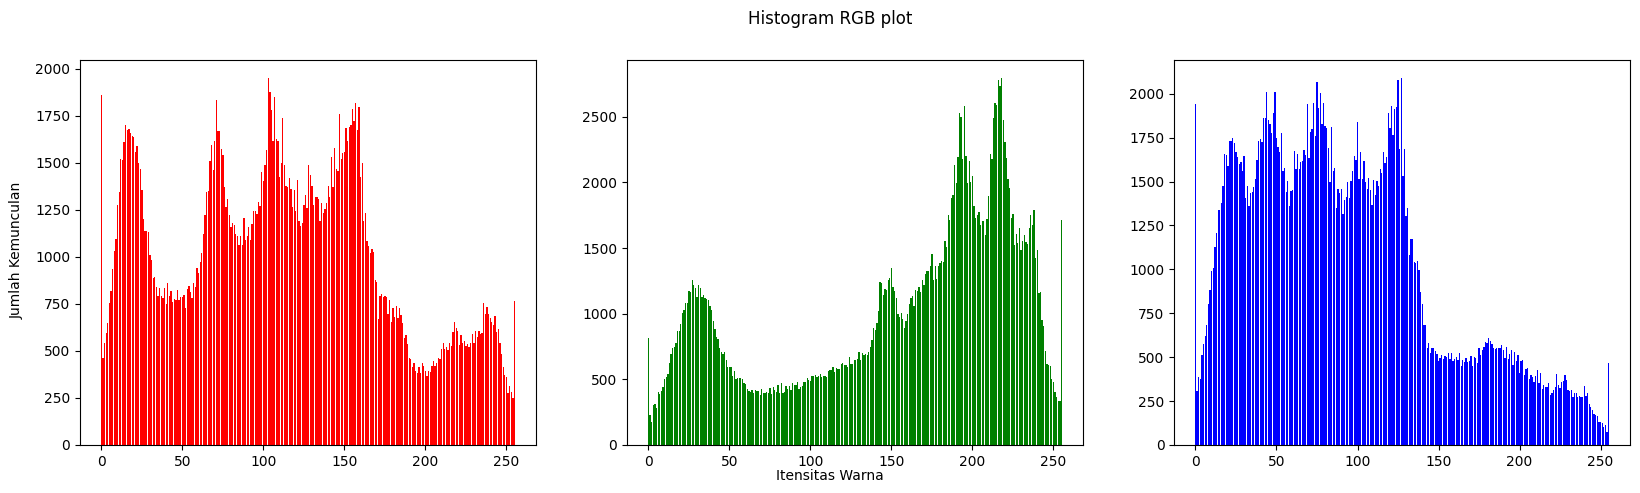

In [5]:
img = cv.imread('/content/drive/MyDrive/Tugas PCVK/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0, height):
  for x in range(0, width):
    red[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    blue[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize = [20,5], sharex = True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Itensitas Warna', ha='center')
axs[0].bar(names, green, color='red')
axs[1].bar(names, red, color='green')
axs[2].bar(names, blue, color='blue')

**PERTANYAAN PRAKTIKUM D1**

1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh
NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

2. Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung
gelap, terang, atau kontras rendah.

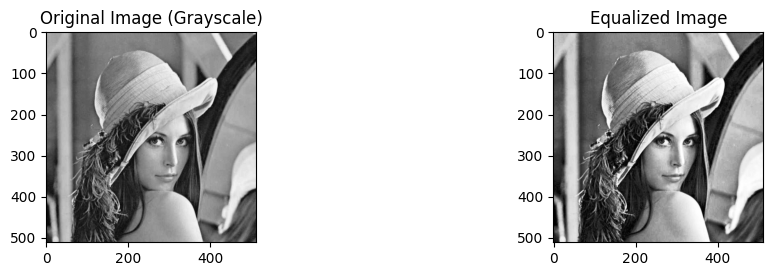

In [17]:
img = cv.imread('/content/drive/MyDrive/Tugas PCVK/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

height, width = np.shape(img)
names = np.arange(256)

gray_hist = [0]*256

for y in range(0, height):
  for x in range(0, width):
    gray_hist[img_gray[y][x]] += 1

equalized = cv.equalizeHist(img)
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.imshow(img, cmap="gray")
plt.title("Original Image (Grayscale)")

plt.subplot(2,2,2)
plt.imshow(equalized, cmap="gray")
plt.title("Equalized Image")

plt.show()